Mean Squared Error: 0.0004214577202219516


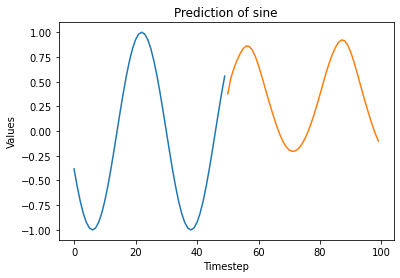

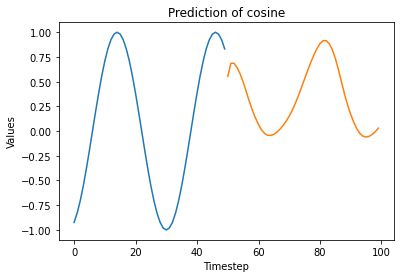

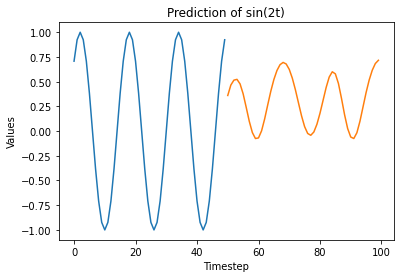

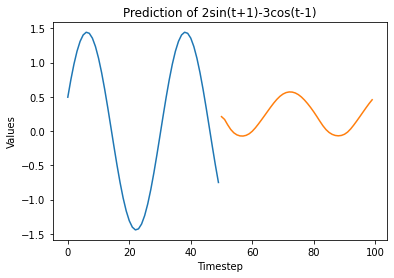

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Load and preprocess data
data = pd.read_csv('trig.csv', header=0, index_col=0)
raw_data = data.values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(raw_data)

# Split data into train and test sets
# train_size = int(len(data) * 0.7)
train_size = 900
test_size = len(data) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data),:]

# Define the number of time steps and features
n_steps_in = 50
n_steps_out = 50
n_features = data.shape[1]

# Reshape data for LSTM
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        if out_end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix-1:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(50, activation='tanh', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))

# Compile and fit the model
model.compile(optimizer='adam', loss='mse')
train_history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)

# Get the last n_steps_in time steps of the original data
x_original = raw_data[-n_steps_in:, :]

# Reshape predictions for inverse scaling
x_original = x_original.reshape((1, n_steps_in, n_features))

# Make predictions on test data
y_pred = model.predict(x_original)

# Get the forecast values into the future
forecast = y_pred[0, :, :]
# print(forecast)

# Plot the results
attr = ["sine", "cosine", "sin(2t)", "2sin(t+1)-3cos(t-1)"]
for i in range(len(attr)):
    title = "Prediction of " + str(attr[i])
    pred_df = pd.DataFrame(forecast)
    index = pd.Index(list(range(n_steps_in, n_steps_in + n_steps_out)))
    pred_df = pred_df.set_index(index)
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel("Values")
#     plt.plot(raw_data[train_size:len(data),1])
    plt.plot(raw_data[train_size-n_steps_in:train_size,i])
    plt.plot(pred_df[i])
    plt.show()


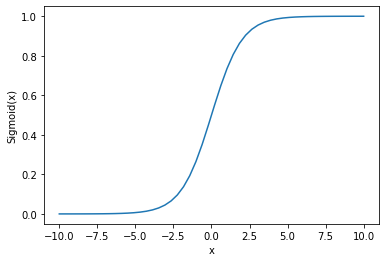

In [76]:
def sig(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-10, 10, 50)
p = sig(x)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.plot(x, p)
plt.show()

### WaterTank

Mean Squared Error: 0.019127769395709038
(8982, 7)
[[ 1.0416397e+00  3.2069623e+00  3.1556253e+00 ...  5.2507496e-01
  -1.3666937e-02  1.5219169e+00]
 [ 9.6441990e-01  3.1866314e+00  3.0478590e+00 ...  5.1760423e-01
  -7.9178661e-03  1.5167079e+00]
 [-6.0574271e-02  3.1522403e+00  3.1147125e+00 ...  5.1335472e-01
  -4.2924285e-04  1.5400128e+00]
 ...
 [-2.8949199e-02  3.2125285e+00  3.1668479e+00 ...  5.3274935e-01
  -1.6200298e-02  2.0212722e+00]
 [ 7.2424668e-01  3.1453075e+00  3.0687921e+00 ...  5.1688951e-01
  -7.3628817e-03  2.0490015e+00]
 [ 1.0452354e+00  3.1622581e+00  3.0853496e+00 ...  5.2170968e-01
  -5.5028684e-04  2.0532248e+00]]
Root Mean Squared Error: 0.16421182879753018
----------Learning Curve----------


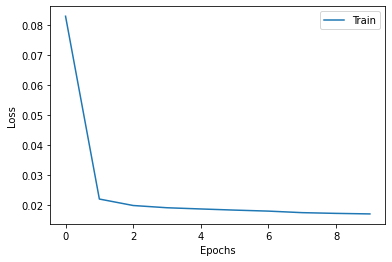

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 100)               43200     
                                                                 
 repeat_vector_20 (RepeatVec  (None, 3, 100)           0         
 tor)                                                            
                                                                 
 lstm_41 (LSTM)              (None, 3, 100)            80400     
                                                                 
 time_distributed_20 (TimeDi  (None, 3, 7)             707       
 stributed)                                                      
                                                                 
Total params: 124,307
Trainable params: 124,307
Non-trainable params: 0
_________________________________________________________________


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Load and preprocess data
data = pd.read_csv('waterTank-Golden.csv', header=0, index_col=0)
raw_data = data.values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(raw_data)

# Split data into train and test sets
# train_size = int(len(data) * 0.7)
train_size = 12000
test_size = len(data) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data),:]

# Define the number of time steps and features
n_steps_in = 5
n_steps_out = 3
n_features = data.shape[1]

# Reshape data for LSTM
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        if out_end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix-1:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))

# Compile and fit the model
model.compile(optimizer='adam', loss='mse')
train_history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)

# Make predictions on test data
y_pred = model.predict(X_test)

# Reshape predictions for inverse scaling
# y_pred_reshaped = y_pred.reshape((y_pred.shape[0]*y_pred.shape[1], n_steps_out, n_features))
# y_test_reshaped = y_test.reshape((y_test.shape[0]*y_test.shape[1], n_steps_out, n_features))

# Extract only the result of prediction for n_steps_out=3
result_pred = y_pred[:, -n_steps_out:, :]

# Reshaping


# Inverse scale predictions and test data
result_pred_inv = scaler.inverse_transform(result_pred.reshape(-1, n_features))

print(result_pred_inv.shape)
print(result_pred_inv)
# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred_inv - y_test_inv)**2))
print('Root Mean Squared Error:', rmse)

# Plot curve
print("----------Learning Curve----------")
plt.plot(train_history.history['loss'], label='Train')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.summary()

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# Load and preprocess data
data = pd.read_csv('waterTank-Golden.csv', header=0, index_col=0)
raw_data = data.values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(raw_data)

# Split data into train and test sets
# train_size = int(len(data) * 0.7)
train_size = 12000
test_size = len(data) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data),:]

# Define the number of time steps and features
n_steps_in = 50
n_steps_out = 30
n_features = data.shape[1]

# Reshape data for LSTM
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        if out_end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix-1:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X_train, y_train = split_sequence(train, n_steps_in, n_steps_out)
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))

# Compile and fit the model
model.compile(optimizer='adam', loss='mse')
train_history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)

# Get the last n_steps_in time steps of the original data
x_original = raw_data[-n_steps_in:, :]

# Reshape predictions for inverse scaling
x_original = x_original.reshape((1, n_steps_in, n_features))

# Make predictions on test data
y_pred = model.predict(x_original)

# Get the forecast values into the future
forecast = y_pred[0, :, :]
print(forecast)


Mean Squared Error: 0.003978929948061705
[[ 0.45571578  1.8851562   1.9268254   0.48179865  2.0923655   1.4596227
   1.245437  ]
 [ 0.27159584  2.0130994   1.8466368   0.07767165  1.9476416   1.450569
   0.7041875 ]
 [-0.32904056  2.1513515   1.7938976  -0.5185207   1.883643    1.6444148
   0.6258521 ]
 [ 1.5351135   1.9200556   1.5533626   1.2487704   1.5591592   1.1470649
   0.6991088 ]
 [ 1.6261268   1.864217    1.421965    1.3277694   1.4037356   1.7492732
   0.9008087 ]
 [-0.10122097  1.8656423   1.4939915  -0.36162436  1.7248721   1.7854935
   0.8583926 ]
 [-0.88762486  1.6812807   1.5217642  -0.8788954   1.7344584   1.4314831
   0.8446097 ]
 [ 0.44875067  1.6196972   1.5551481   0.52167636  1.6343588   1.2203318
   0.77516896]
 [ 1.0559598   1.6855087   1.5434936   0.9820543   1.5840064   1.3227469
   0.91754943]
 [ 1.4986423   1.7458984   1.4982009   1.3323759   1.577097    1.0417719
   0.85470563]
 [-0.35288107  1.7281783   1.7420883  -0.4401039   1.8789973   0.49220163
   0.7

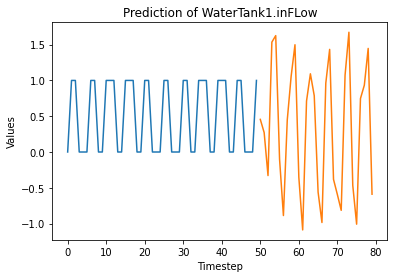

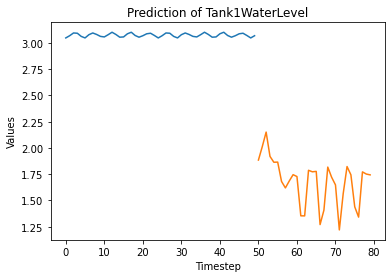

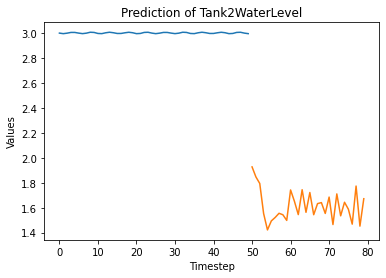

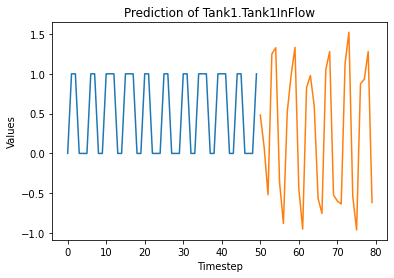

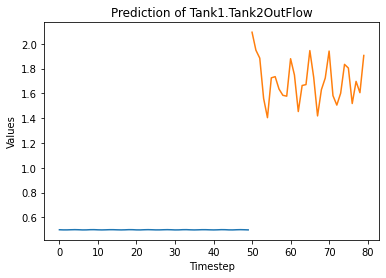

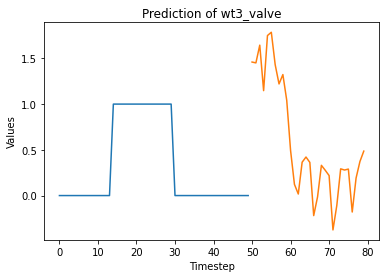

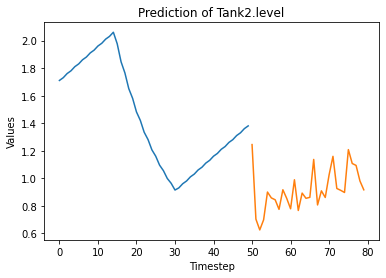

In [82]:
# Plot the results
attr = ["WaterTank1.inFLow", "Tank1WaterLevel", "Tank2WaterLevel", "Tank1.Tank1InFlow", "Tank1.Tank2OutFlow", "wt3_valve", "Tank2.level"]
for i in range(len(attr)):
    title = "Prediction of " + str(attr[i])
    pred_df = pd.DataFrame(forecast)
    index = pd.Index(list(range(n_steps_in, n_steps_in + n_steps_out)))
    pred_df = pred_df.set_index(index)
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel("Values")
#     plt.plot(raw_data[train_size:len(data),1])
    plt.plot(raw_data[train_size-n_steps_in:train_size,i], label='train')
    plt.plot(pred_df[i], label='pred')
    plt.show()

In [84]:
?WordCLoud

Object `WordCLoud` not found.
